In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
data = pd.read_csv("https://raw.githubusercontent.com/tranghth-lux/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [35]:
#Find the shape of the Data
print("SHAPE: ",data.shape)

print('*******************************')

# Checking for any missing values
print(data.isnull().any())

SHAPE:  (14999, 10)
*******************************
satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool


array([[<AxesSubplot:title={'center':'satisfaction_level'}>,
        <AxesSubplot:title={'center':'last_evaluation'}>,
        <AxesSubplot:title={'center':'number_project'}>],
       [<AxesSubplot:title={'center':'average_montly_hours'}>,
        <AxesSubplot:title={'center':'time_spend_company'}>,
        <AxesSubplot:title={'center':'Work_accident'}>],
       [<AxesSubplot:title={'center':'left'}>,
        <AxesSubplot:title={'center':'promotion_last_5years'}>,
        <AxesSubplot:title={'center':'salary'}>]], dtype=object)

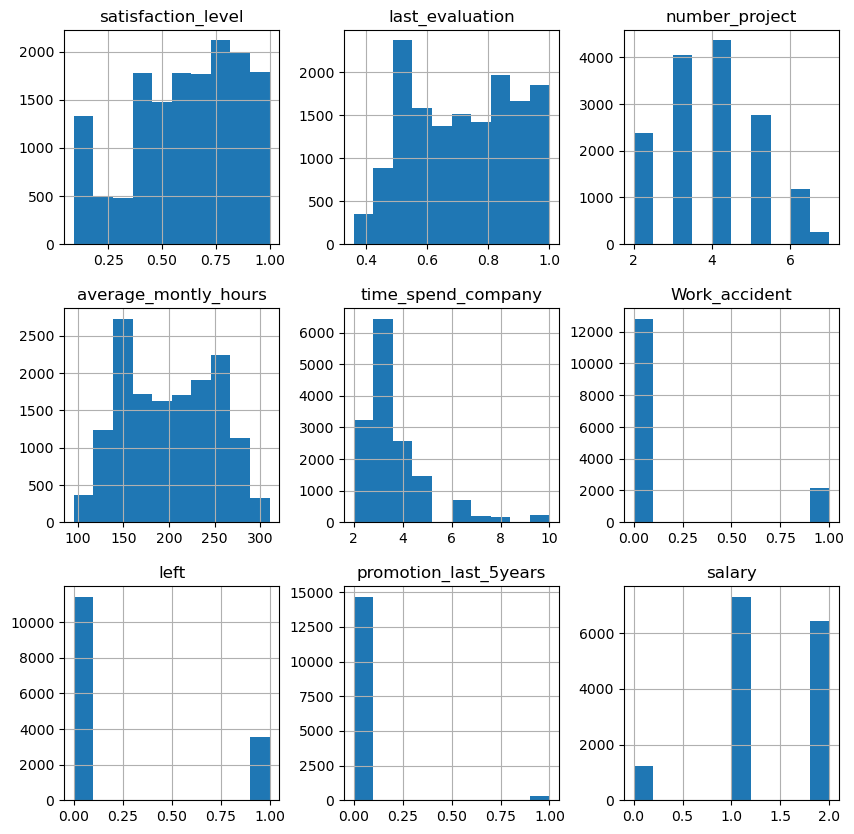

In [21]:
# Visualization of Insghts from the dataset
data.hist(figsize=(10,10))

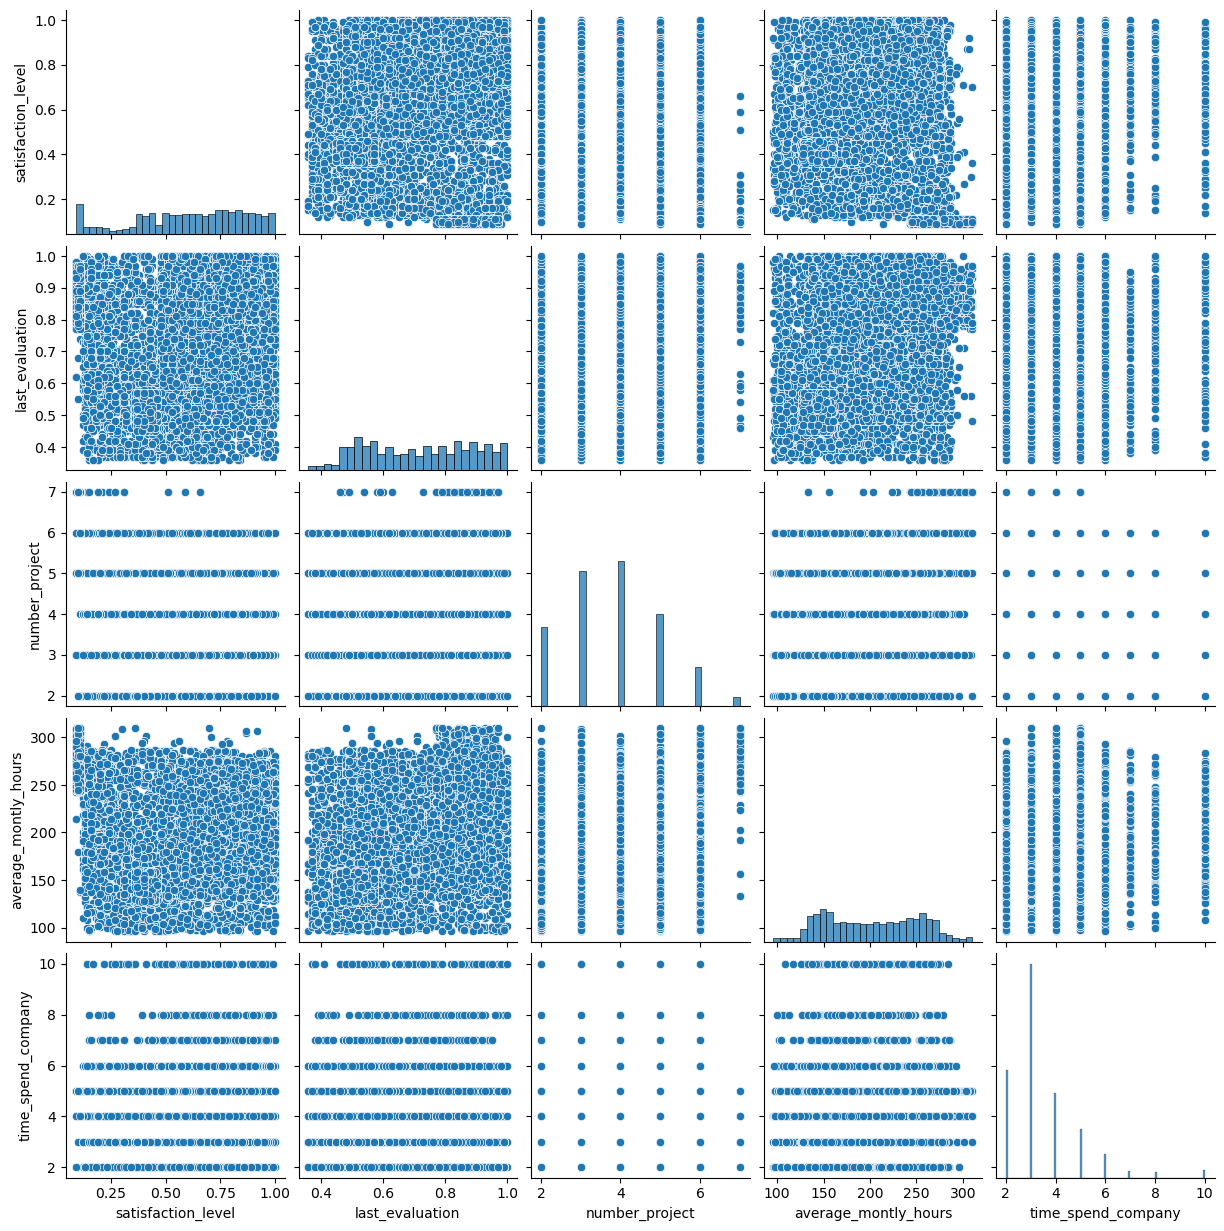

In [56]:
sns.pairplot(data[['satisfaction_level', 'last_evaluation',	'number_project',
                   'average_montly_hours', 'time_spend_company']], diag_kind="hist")
plt.show()

<AxesSubplot:>

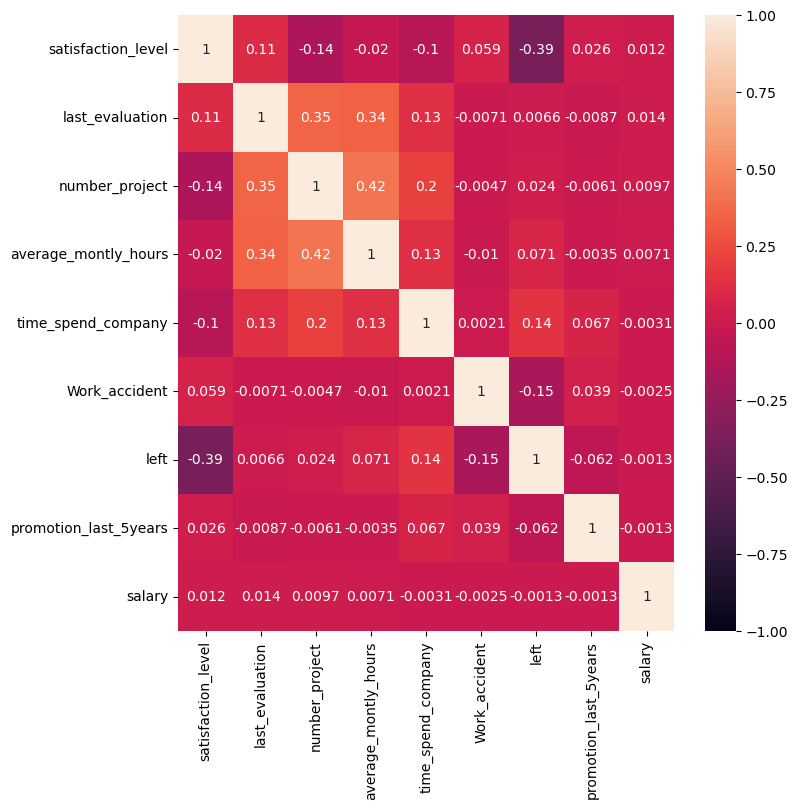

In [32]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)

<AxesSubplot:xlabel='count', ylabel='sales'>

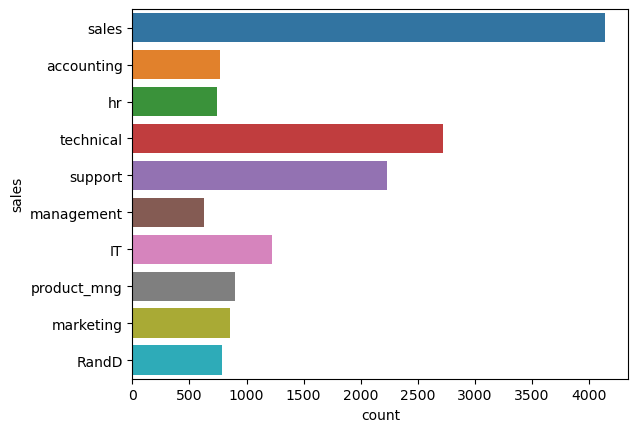

In [36]:
sns.countplot(data=data, y='{}'.format('sales'))

<AxesSubplot:xlabel='left', ylabel='average_montly_hours'>

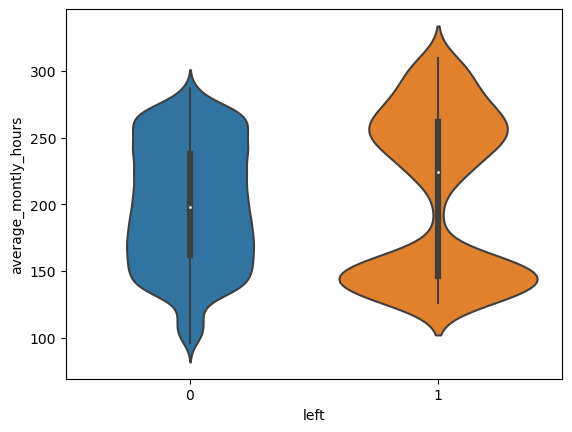

In [48]:
sns.violinplot(data=data, x="left", y="average_montly_hours")

In [4]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
Le

LabelEncoder()

In [5]:
data["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [6]:
data["salary"] = Le.fit_transform(data["salary"])
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [7]:
data["sales"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [8]:
sales_ohe = pd.get_dummies(data["sales"])
sales_ohe

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [9]:
df = pd.get_dummies(data, columns=['sales'])
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,1,0,0,0,0,0,0,0,0,1,0


In [10]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = df.drop('left', axis=1)
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Build and train the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [12]:
lr.fit(X_train, y_train)

LogisticRegression()

In [13]:
y_pred = lr.predict(X_test)

In [14]:
# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7596666666666667


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [16]:
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)

Accuracy: 0.9883333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

